In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('customer_segmentation_1.csv')
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [3]:
print(df.shape)


(8068, 10)


In [4]:
print(df.describe(include='all'))


                   ID Gender Ever_Married          Age Graduated Profession  \
count     8068.000000   8068         7928  8068.000000      7990       7944   
unique            NaN      2            2          NaN         2          9   
top               NaN   Male          Yes          NaN       Yes     Artist   
freq              NaN   4417         4643          NaN      4968       2516   
mean    463479.214551    NaN          NaN    43.466906       NaN        NaN   
std       2595.381232    NaN          NaN    16.711696       NaN        NaN   
min     458982.000000    NaN          NaN    18.000000       NaN        NaN   
25%     461240.750000    NaN          NaN    30.000000       NaN        NaN   
50%     463472.500000    NaN          NaN    40.000000       NaN        NaN   
75%     465744.250000    NaN          NaN    53.000000       NaN        NaN   
max     467974.000000    NaN          NaN    89.000000       NaN        NaN   

        Work_Experience Spending_Score  Family_Size

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB
None


In [6]:
print(df.isnull().sum())

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64


In [7]:
df.drop_duplicates(inplace = True)
df.drop(['ID'],axis=1,inplace=True)

In [8]:
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(include=['object'])

for col in numerical:
    df[col] = df[col].fillna((df[col].mean()))
    

for col in categorical:
    df[col] = df[col].fillna((df[col].mode()))

<Figure size 4032x4032 with 0 Axes>

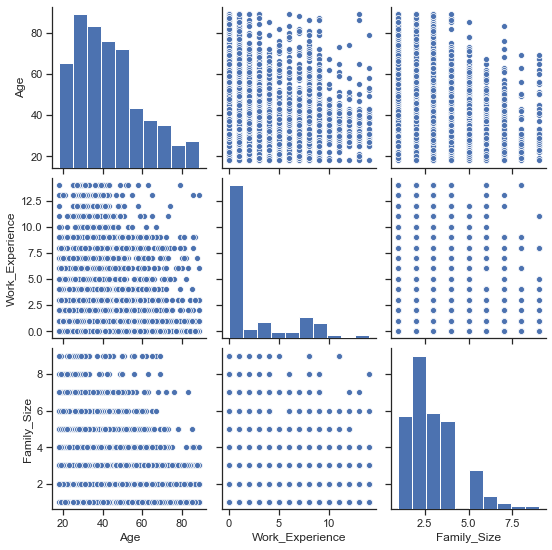

In [9]:
# Pairplot distribution.
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(56, 56))
g = sns.pairplot(numerical)
plt.show()


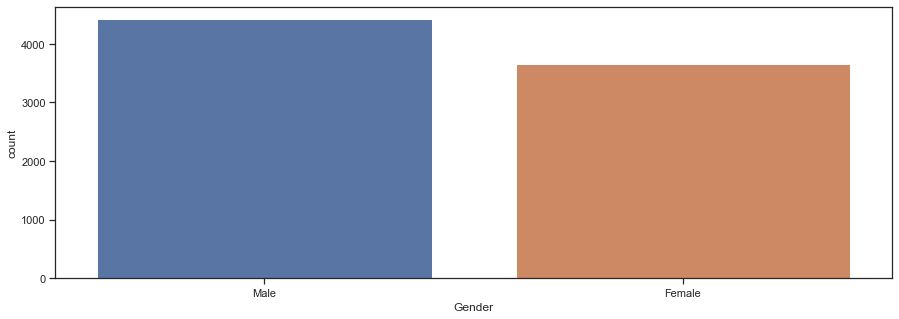

In [10]:
plt.figure(1,figsize = (15 , 5))
sns.countplot('Gender' , data = df)
plt.show()


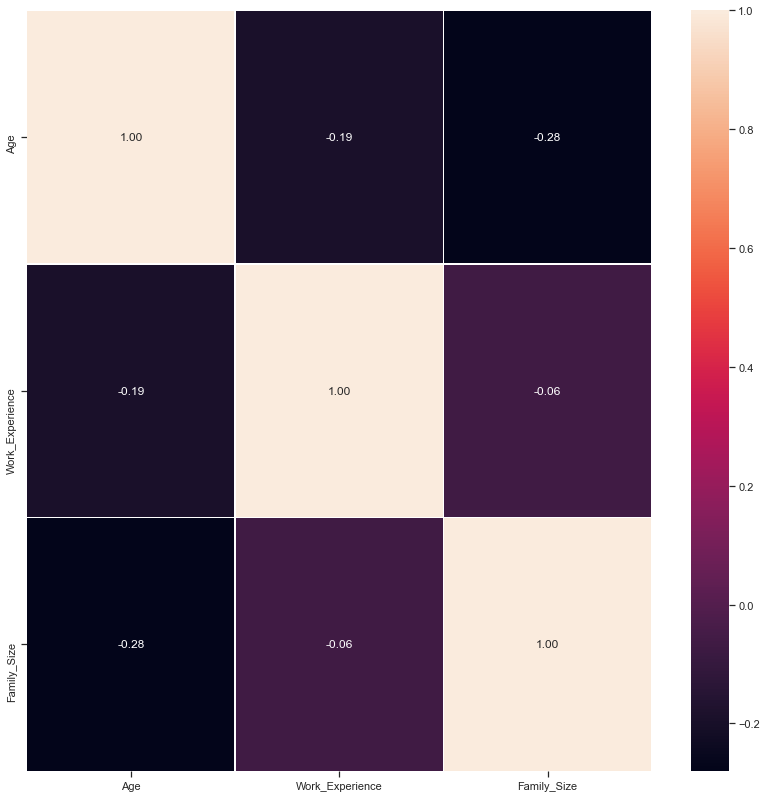

In [11]:
## Heatmap.
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(numerical.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()


In [12]:
# Feature Encoding using  LabelEncoder.
from sklearn.preprocessing import LabelEncoder,StandardScaler
# Instantiate Label encoder object.

for col in categorical:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

print(df.head())

   Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0       1             0   22          0           5         1.000000   
1       0             1   38          1           2         2.641663   
2       0             1   67          1           2         1.000000   
3       1             1   67          1           7         0.000000   
4       0             1   40          1           3         2.641663   

   Spending_Score  Family_Size  Var_1  
0               2          4.0      3  
1               0          3.0      3  
2               2          1.0      5  
3               1          2.0      5  
4               1          6.0      5  


In [13]:
# Feature Scaling:
# Standardize the data.
df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df)
print(df.columns)


RangeIndex(start=0, stop=9, step=1)


In [14]:
inertia = []
centers = []
labels = []
iterations = []
s_scores = []

for n in range(2,11):
    algorithm = KMeans(n_clusters = n,init='k-means++',n_init = 10 ,max_iter=300,
                        tol=0.0001,random_state= 111,algorithm='elkan')
    algorithm.fit(df) # Compute k-means clustering and find the cluster centers.
    preds = algorithm.predict(df) # Predict the closest cluster each sample in X belongs to.
    centers.append(algorithm.cluster_centers_)  # Coordinates of cluster centers. 
    labels.append(algorithm.labels_)     # Labels of each point.
    inertia.append(algorithm.inertia_)   # Sum of squared distances of samples to their closest cluster center.
    iterations.append(algorithm.n_iter_) # Number of iterations run.
    score = silhouette_score(df, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n, score))
    s_scores.append(silhouette_score(df, algorithm.labels_)) # data for the silhouette score method.
print(inertia)
print(centers)
print(labels)
print(iterations)
print(s_scores)

For n_clusters = 2. The average silhouette_score is : 0.19405106173232203
For n_clusters = 3. The average silhouette_score is : 0.16872919529843283
For n_clusters = 4. The average silhouette_score is : 0.1813711440922571
For n_clusters = 5. The average silhouette_score is : 0.1800030476431699
For n_clusters = 6. The average silhouette_score is : 0.17791187219557084
For n_clusters = 7. The average silhouette_score is : 0.18067955116526346
For n_clusters = 8. The average silhouette_score is : 0.17304414365534276
For n_clusters = 9. The average silhouette_score is : 0.1657389164635046
For n_clusters = 10. The average silhouette_score is : 0.16635873947607904
[58576.74760559445, 52909.89465814743, 47299.77723349441, 43938.03448657619, 41363.80636318199, 39355.030221638044, 37587.76152312458, 36225.068689501866, 34465.42795931836]
[array([[-0.13687884, -1.05919315, -0.69222011, -0.25318614,  0.16034179,
         0.13887496,  0.74969392,  0.10496861, -0.11693671],
       [ 0.10282997,  0.795

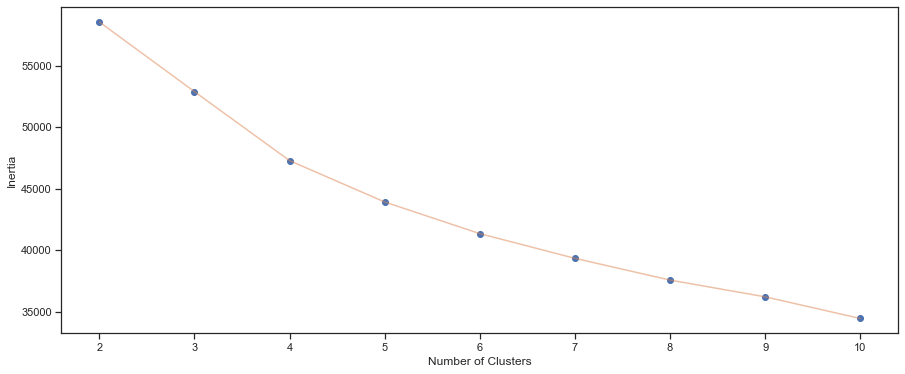

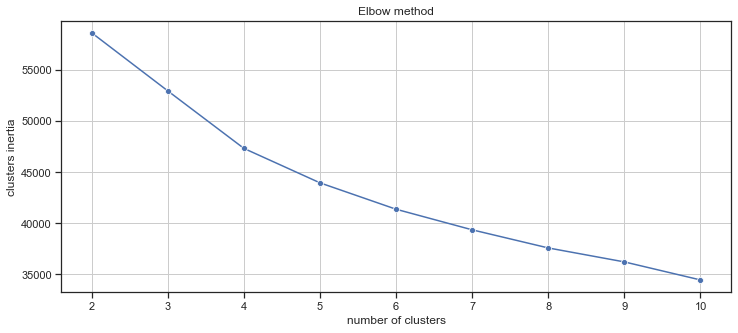

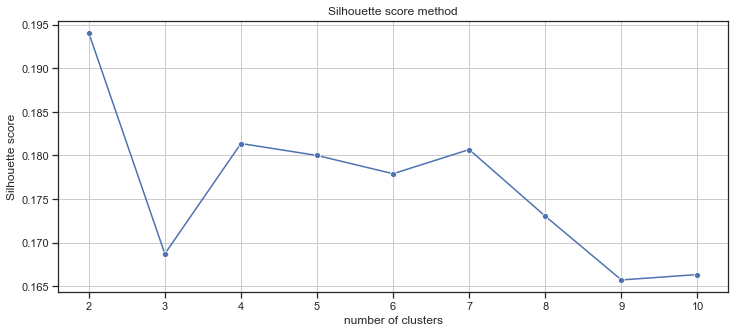

In [15]:
k = np.arange(2 , 11)
plt.figure(1, figsize = (15 ,6))
plt.plot(k,inertia , 'o')
plt.plot(k,inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
# ax.axvline(5, ls="--", c="red")
# ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
# ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()


[2 0 1 ... 2 2 0]
[[ 0.07898067  0.80842002  0.12483286  0.21500025 -0.46153407  0.00679868
  -1.30785903  0.30048084 -0.05060829]
 [ 0.10936403  0.68753302  0.98796151  0.17562638  0.29824153 -0.25250147
   0.34781636 -0.55922579  0.26218714]
 [-0.13102547 -1.05737737 -0.74263625 -0.27646452  0.14982031  0.16080598
   0.75129807  0.14231033 -0.13434842]]


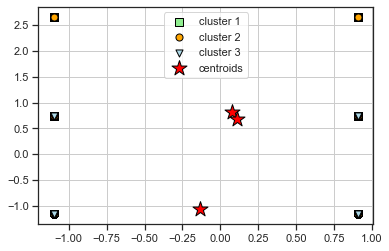

In [16]:
# algorithm = KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300,
#                         tol=0.0001,  random_state= 111  , algorithm='elkan')
# # algorithm.fit(df)
# y_km = algorithm.fit_predict(df)
# labels1 = algorithm.labels_
# centroids1 = algorithm.cluster_centers_
# print(labels1)
# print(centroids1)

# # plot the 3 clusters.
# plt.scatter(
#     df.values[y_km == 0, 0], df.values[y_km == 0, 1],
#     s=50, c='lightgreen',
#     marker='s', edgecolor='black',
#     label='cluster 1'
# )

# plt.scatter(
#     df.values[y_km == 1, 0], df.values[y_km == 1, 1],
#     s=50, c='orange',
#     marker='o', edgecolor='black',
#     label='cluster 2'
# )

# plt.scatter(
#     df.values[y_km == 2, 0], df.values[y_km == 2, 1],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 3'
# )

# # plot the centroids
# plt.scatter(
#     algorithm.cluster_centers_[:, 0], algorithm.cluster_centers_[:, 1],
#     s=250, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )
# plt.legend(scatterpoints=1)
# plt.grid()
# plt.show()

In [17]:
from sklearn import mixture
# Loop through clusters
for n_clusters in range(2 , 11):
    # TODO: Apply your clustering algorithm of choice to the reduced data
    clusterer = mixture.GaussianMixture(n_components=n_clusters).fit(df)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(df)

    means = clusterer.means_
    centers.append(algorithm.cluster_centers_)
    labels.append(algorithm.labels_)
    inertia.append(algorithm.inertia_)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))



For n_clusters = 2. The average silhouette_score is : 0.11482749627379459
For n_clusters = 3. The average silhouette_score is : 0.1159940859908207
For n_clusters = 4. The average silhouette_score is : 0.1481753125312208
For n_clusters = 5. The average silhouette_score is : 0.13949594077613697
For n_clusters = 6. The average silhouette_score is : 0.1006341690515687
For n_clusters = 7. The average silhouette_score is : 0.08570697649446508
For n_clusters = 8. The average silhouette_score is : 0.08484948363540198
For n_clusters = 9. The average silhouette_score is : 0.07198198828793341
For n_clusters = 10. The average silhouette_score is : 0.11096978663875538


In [18]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM.
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(df)
        bic.append(gmm.bic(df))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
print(bic)


[206153.88615514242, 200653.95205328954, 197775.07052527554, 194724.78205735362, 191584.54442951744, 189777.66444977568, 196589.72069194532, 183904.52114577865, 176618.4249422571, 175791.4118375315, 77136.07634569431, 160182.06456350055, 206225.85144233503, 104713.92302997471, 45919.839904865315, 25100.039661946274, 771.9458594601997, -13611.948310512002, 196589.7206919453, 100711.39323906896, 42288.889179712634, 21371.51651410447, 21714.91658820435, -35549.87412576857]


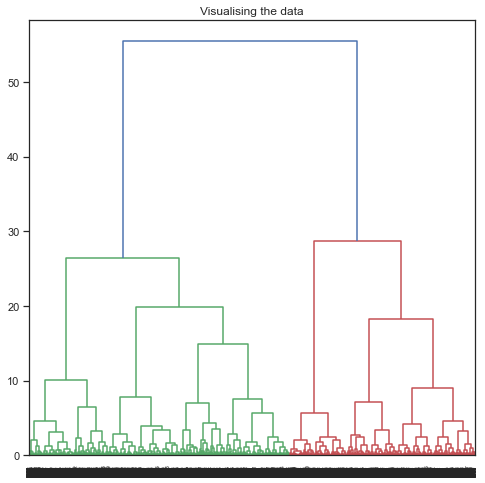

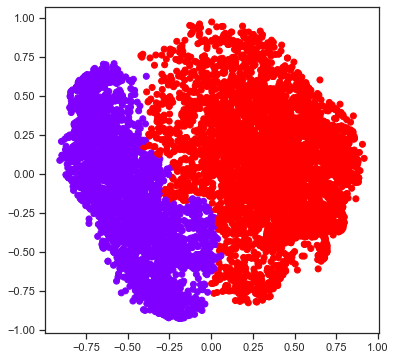

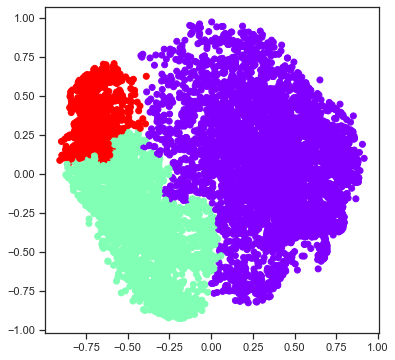

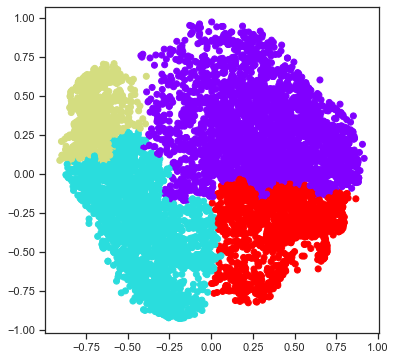

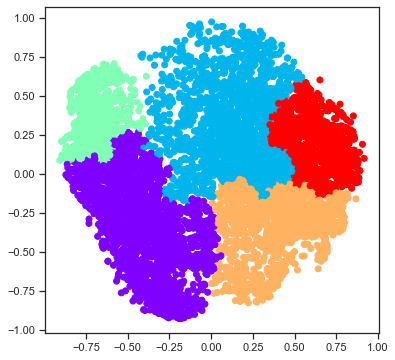

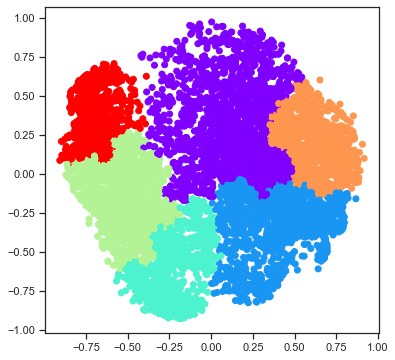

[0.44479698902861703, 0.39754915942848007, 0.3258076328651727, 0.3342959994799696, 0.33359848145473]


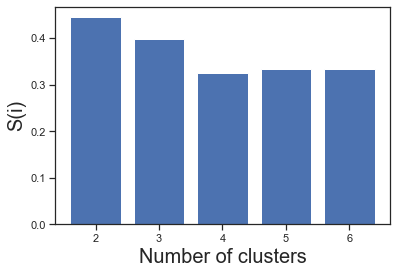

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(df)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
ac2 = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

ac4 = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

k = [2, 3, 4, 5, 6]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))

print(silhouette_scores)

# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()
